### Introduction
DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has been consistent in paying attention to its customer experience so that customers will not leave it.

Even though it's only a little over 1 year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of churn customers by using machine learning.

Data load from : https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv

### Table of Contents
1. Performing Exploratory Data Analysis
2. Doing Data Pre-Processing
3. Modeling Machine Learning
4. Determining the Best Model

### Import Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle 
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

### File Unloading

In [4]:
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

In [5]:
print(df_load.shape)

(6950, 13)


In [6]:
print(df_load.head)

<bound method NDFrame.head of       UpdatedAt   customerID  gender SeniorCitizen Partner  tenure  \
0        202006  45759018157  Female            No     Yes       1   
1        202006  45315483266    Male            No     Yes      60   
2        202006  45236961615    Male            No      No       5   
3        202006  45929827382  Female            No     Yes      72   
4        202006  45305082233  Female            No     Yes      56   
...         ...          ...     ...           ...     ...     ...   
6945     202006  45437311872    Male            No      No       1   
6946     202006  45184632574  Female           Yes      No       1   
6947     202006  45023517923  Female            No      No       1   
6948     202006  45665022680  Female            No     Yes      72   
6949     202006  45957014561    Male            No      No      64   

     PhoneService StreamingTV InternetService PaperlessBilling  \
0              No          No             Yes              Yes 

### Exploratory Data Analysis

In [6]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing Churn Percentage

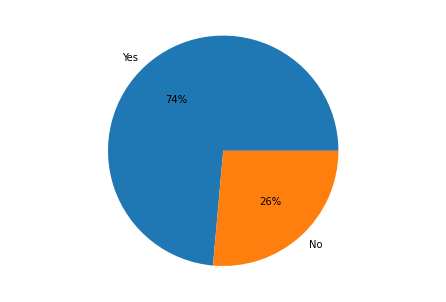

In [7]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

#### Exploratory Data Analysis (EDA) Numeric Variabel 

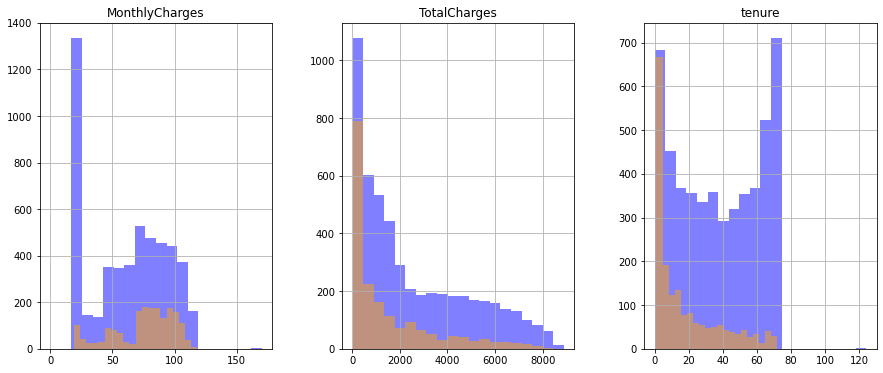

In [8]:
from matplotlib import pyplot  as plt
import numpy as np

# creating bin chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1,3, figsize = (15,6))

df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

#### Exploratory Data Analysis (EDA) Categorical Variabel

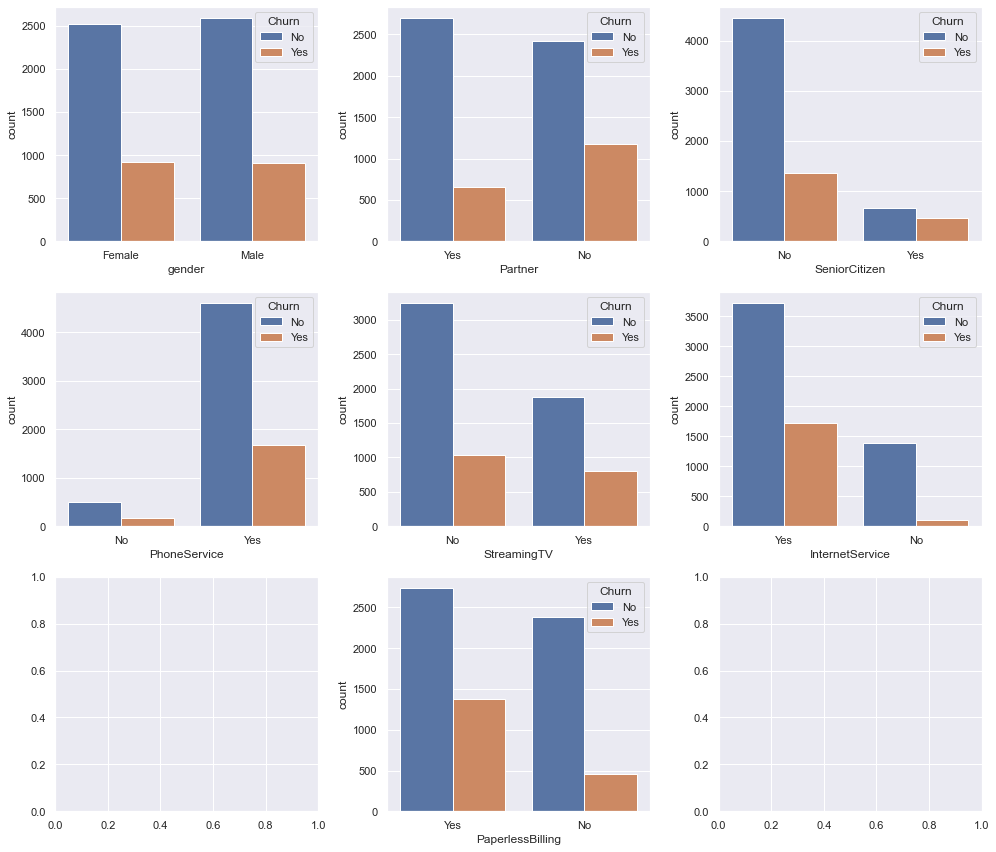

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

### Data PreProcessing

#### Remove Unnecessary Columns

In [10]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
print(cleaned_df.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


#### Encoding Data

In [13]:
# Encoding Data
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [14]:
cleaned_df.head(2)

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,29.85,29.85,0
1,1,0,1,60,1,0,0,1,20.50,1198.80,0


#### Splitting Dataset

In [20]:
# Splitting Dataset

from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('The number of rows and columns of x_train is:', x_train.shape,'\nThe number of rows and columns of y_train is:', y_train.shape)
print('Churn percentage in Training data is:')
print(y_train.value_counts(normalize=True))
print('The number of rows and columns of x_test is:', x_test.shape,'\nThe number of rows and columns of y_test is:', y_test.shape)
print('Churn percentage in Testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is: (4865, 10) 
The number of rows and columns of y_train is: (4865,)
Churn percentage in Training data is:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
The number of rows and columns of x_test is: (2085, 10) 
The number of rows and columns of y_test is: (2085,)
Churn percentage in Testing data is:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


#### Conclusions
1. After further analysis, it turns out that there are columns that are not needed in the model, namely the customer ID number (customerID) & the data collection period (UpdatedAt), so this needs to be deleted.
2. Then we continue to change the value of the data that is still in the form of a string into numeric through encoding, after that it can be seen that the distribution of the data, especially the min and max columns of each variable, has changed to 0 & 1.
3. The last stage is to divide the data into 2 parts for modeling purposes, after it is seen from the number of rows and columns of each data is appropriate & the percentage of churn column is also the same as the data at the beginning, this indicates that the data is separated properly and correctly.



### Modelling: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)

In [23]:
# Performansi Model Training - Show the Metrics

# Evaluating Model
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.65      0.49      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.78      0.80      0.79      4865



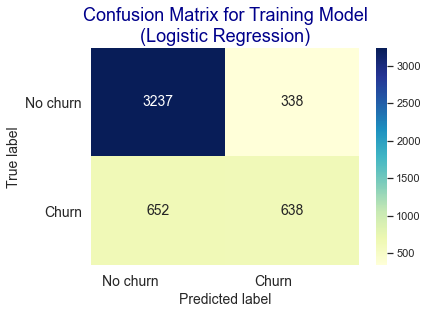

In [24]:
# Performansi Model Training - Showing Plots

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [25]:
# Performansi Data Testing - Showing Metrics

from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



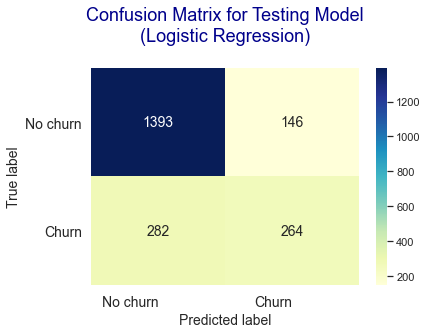

In [26]:
# Performansi Data Testing - Showing Plots
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Conlusions
From the results and analysis above, then:
1. If we use the logistic regression algorithm by calling LogisticRegression() from sklearn without adding any parameters, then the result is a model with default settings from sklearn, details can be seen in the documentation.
2. From the training data, it can be seen that the model is able to predict the data by producing an accuracy of 80%, with details of the correct churn guess, the churn is 638, the guess that doesn't churn which actually doesn't churn is 3237, the guess that doesn't churn that actually churn is 652 and the guess that doesn't churn is actually 652 The actual churn that doesn't churn is 338.
3. From the data testing, it can be seen that the model is able to predict the data by producing an accuracy of 79%, with the details of the churn guess which is actually true churn is 264, the guess that does not churn which actually does not churn is 1392, the guess that does not churn the actual churn is 282 and the guess that doesn't churn is actually 282 The actual churn that doesn't churn is 146.

### Modelling : Random Forest Classifier

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [28]:
# Performansi Data Training - Showing Metrics
from sklearn.metrics import classification_report
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       0.99      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



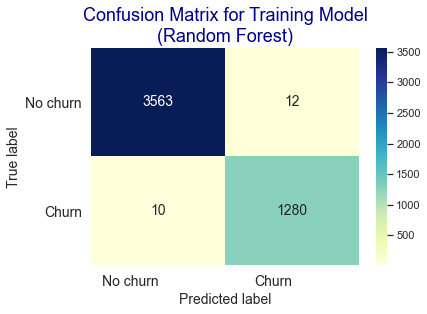

In [29]:
# Performansi Data Training - Showing Plots
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [30]:
# Performansi Data Testing - Showing Metrics
from sklearn.metrics import classification_report
# Predict
y_test_pred = rdf_model .predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.58      0.47      0.52       546

    accuracy                           0.77      2085
   macro avg       0.70      0.68      0.69      2085
weighted avg       0.76      0.77      0.76      2085



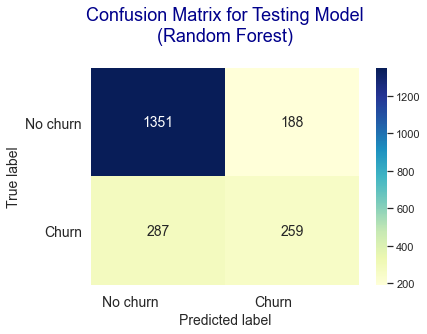

In [31]:
# Performansi Data Testing - Showing Plots
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Conlusions
From the results and analysis above, then:

1. If we use the Random Forest algorithm by calling RandomForestClassifier() from sklearn without adding any parameters, then the resulting model with the default settings of sklearn, for details can be seen in the documentation.
2. From the training data, it can be seen that the model is able to predict the data by producing an accuracy of 100%, with details of the correct churn guess, the churn is 1278, the guess not churn that actually doesn't churn is 3566, the guess not churn that actually churn is 12 and the guess is not churn The actual churn that doesn't churn is 9.
3. From the data testing, it can be seen that the model is able to predict the data by producing an accuracy of 78%, with the details of the correct churn guess, the churn is 262, the non-churn guess that doesn't actually churn is 1360, the no-churn guess that actually churns is 284 and the guess is 284 The actual churn that doesn't churn is 179.

### Modelling: Gradient Boosting Classifier

In [33]:
#  Algoritma Gradient Boosting Classifier.
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

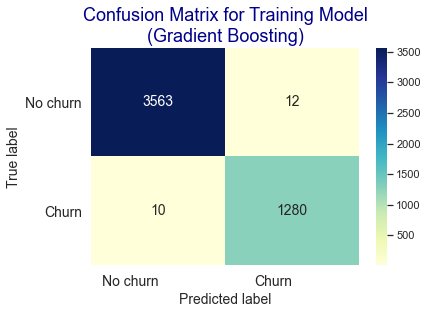

In [34]:
# Perfomansi Model Data Training - Showing Plots

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [35]:
# Performansi Model Data Testing - Showing Metrics
from sklearn.metrics import classification_report
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



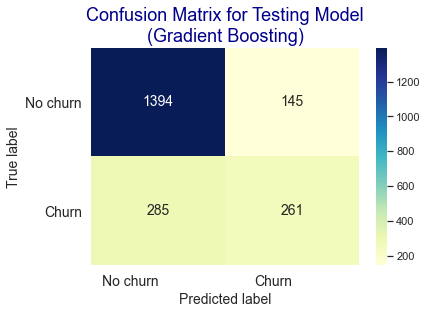

In [36]:
# Performansi Model Data Testing - Showing Plots
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Conclusions
From the results and analysis above, then:

1. Jika kita menggunakan menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
2. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan churn yang sebenernya benar churn adalah 684, tebakan tidak churn yang sebenernya tidak churn adalah 3286, tebakan tidak churn yang sebenernya benar churn adalah 606 dan tebakan churn yang sebenernya tidak churn adalah 289.
3. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1394, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 145.

### Determining the Best Model Algorithm

A good model is a model that is able to provide good performance in the training and testing phases of the model.
1. Over-fitting is a condition where the model is able to predict very well in the training phase, but cannot predict as well in the testing phase.
2. Under-fitting is a condition where the model is not able to predict well in the training phase, but is able to predict well in the testing phase.
3. Appropriate-Fitting is a condition where the model is able to predict well in the training phase and in the testing phase.

In [93]:
print(log_model)
#Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

LogisticRegression()


### Conclusions
Based on the modeling that has been done using Logistic Regression, Random Forest and Extreme Gradiant Boost, it can be concluded that: 
1. Predicting churn from telco customers using this dataset, the best model is to use the Logistic Regression algorithm.
2. This is because the performance of the Logistic Regression model tends to be able to predict equally well in the training and testing phases (80% training accuracy, testing accuracy 79%), on the other hand other algorithms tend to over-fitting their performance.
3. However, this does not make us draw the conclusion that if to do any modeling, we use Logistic Regression, we still have to do a lot of model experiments to determine which one is the best.